In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import time
# from aepsf import VAELoss, VAE, make_mock
# import pickle
import torchvision


In [2]:
data = torchvision.datasets.MNIST('./local_data/', transform=torchvision.transforms.ToTensor(), download=True)

numbers = []
targets = []

for i , (x, y) in enumerate(data):
    numbers.append(x.detach().numpy()[0].reshape(-1)) # to have vector in numpy array like would be PSFs
    targets.append(y)

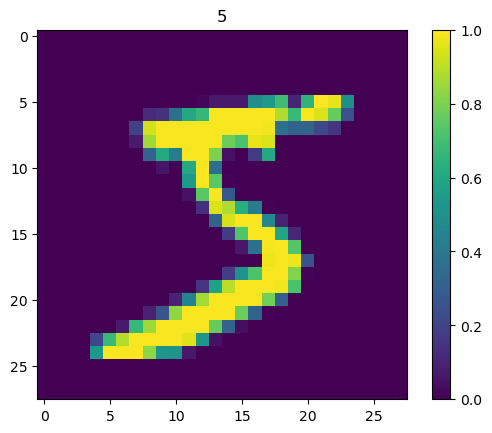

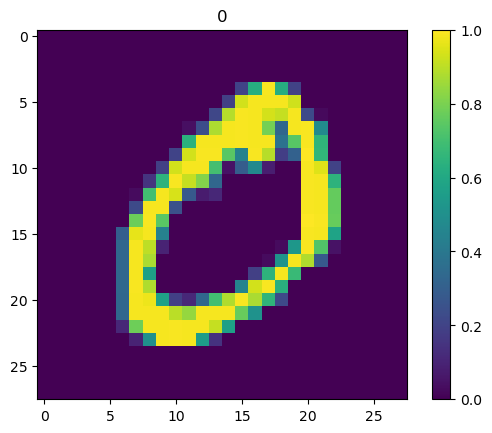

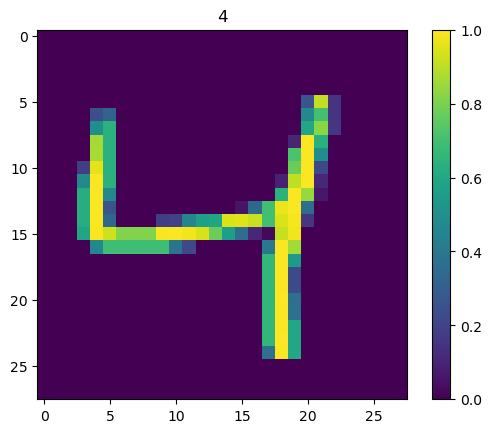

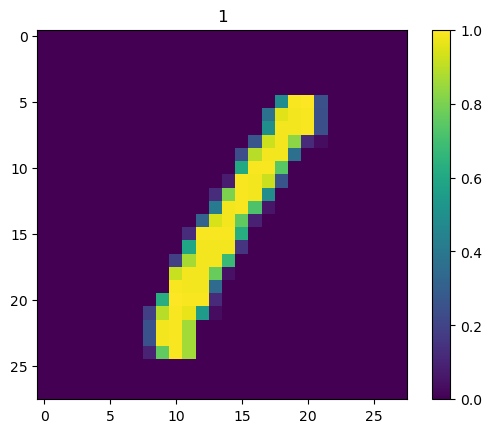

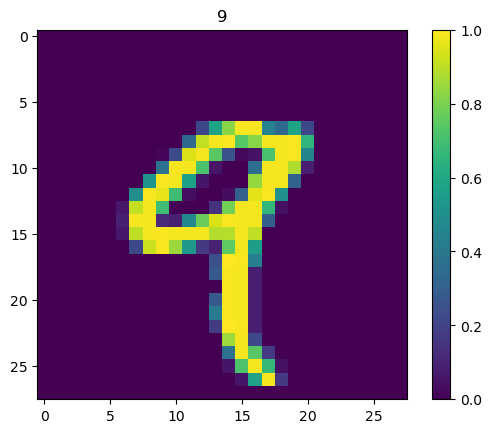

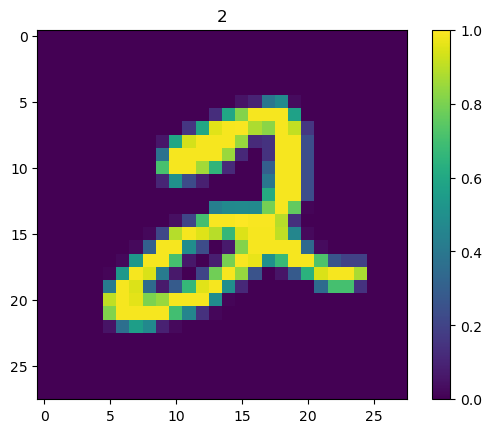

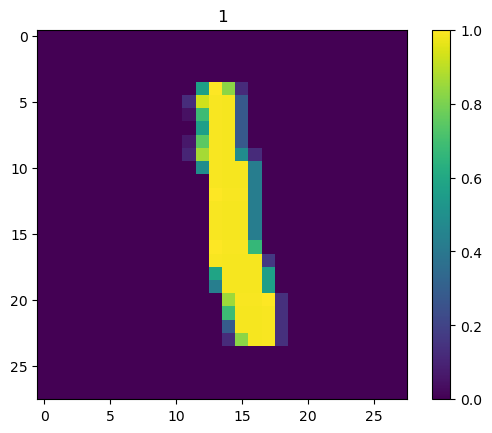

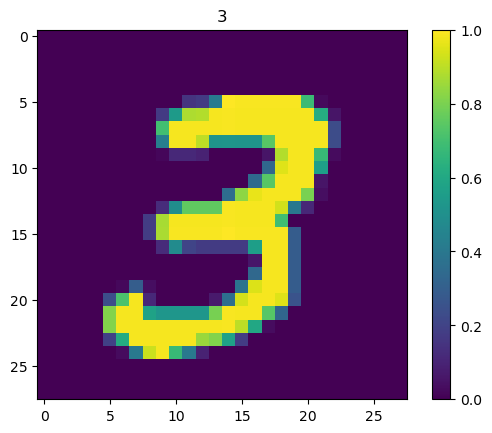

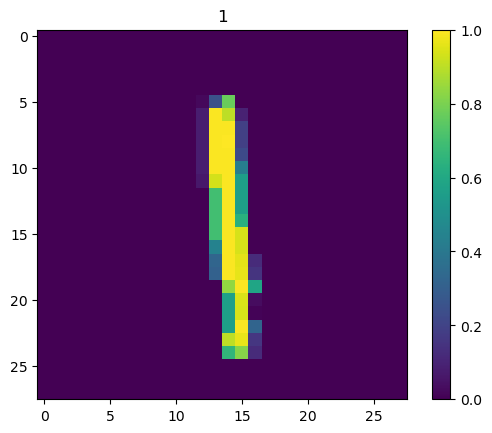

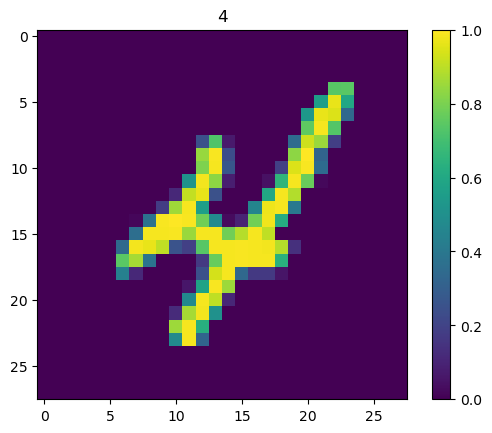

In [3]:
for i in range(10):
    plt.figure()
    plt.imshow(numbers[i].reshape(28,28))
    plt.title(targets[i])
    plt.colorbar()

In [11]:
from vae_psf import load_train_data
from vae_psf import VAE
import time

DEVICE = 'cpu'
# DEVICE = 'mps'

train_loader, val_loader = load_train_data(numbers, train_ratio=0.8, batch_size=64, device=DEVICE)
# Instantiate VAE model
vae_model = VAE(N_pixel=28*28, layers_n_hidden_units=[512, 256, 128], latent_dim=2, device=DEVICE).to(DEVICE)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
)
Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=784, bias=True)
)


In [12]:
from vae_psf import training_loop

START = time.time()

tl = training_loop(vae_model, train_loader, val_loader, device=DEVICE, lr=0.001)
tl.train_loop(epochs=10)

END = time.time()

print(END - START)

Epoch 1 loss: 2347514.177490 validation loss: 549289.375000
Epoch 2 loss: 2145946.842773 validation loss: 528312.812500
Epoch 3 loss: 2064958.528076 validation loss: 513835.875000
Epoch 4 loss: 2021558.578369 validation loss: 545171.875000
Epoch 5 loss: 1995288.597656 validation loss: 544635.250000
Epoch 6 loss: 1972343.980469 validation loss: 509605.406250
Epoch 7 loss: 1954897.009766 validation loss: 552037.562500
Epoch 8 loss: 1942143.011230 validation loss: 568414.125000
Epoch 9 loss: 1930939.644287 validation loss: 580176.562500
Epoch 10 loss: 1920974.246582 validation loss: 577275.500000
32.06903791427612


In [ ]:
plt.plot(tl.total_loss)
plt.plot(tl.val_loss)
#plt.yscale('log')

In [ ]:
for i in range(20):

    x = x_val[i].detach().numpy().reshape(28,28)
    x_hat = x_hat_val[i].detach().numpy().reshape(28,28)
    
    plt.figure(figsize=(12,5))
    plt.subplots_adjust(wspace=0.4, left=0.05, right=0.95)
    plt.subplot(1,3,1)
    plt.imshow(x, cmap=plt.cm.seismic, vmin=-1, vmax=1)
    plt.gca().invert_yaxis()
    plt.colorbar()

    plt.subplot(1,3,2)
    plt.imshow(x_hat, cmap=plt.cm.seismic, vmin=-1, vmax=1)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.yticks([],[])

    plt.subplot(1,3,3)
    plt.imshow(((x_hat-x) / x) * 200, cmap=plt.cm.seismic, vmin=-10, vmax=10)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.yticks([],[])

In [ ]:
A = mu_val.detach().numpy()
plt.scatter(A[:,0], A[:,1])
plt.figure()
plt.scatter(A[:,0], A[:,2])
plt.figure()
plt.scatter(A[:,1], A[:,2])

In [ ]:
VAE?

In [ ]:
device = next(vae_model.model_decode.parameters()).device
print(device)

In [7]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

In [8]:
torch.backends.mps.is_available()

True

In [9]:
torch.backends.mps.is_built()

True